# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# Inspect the shapes of the datasets
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cg = to_categorical(y_train, num_classes=10)
y_test_cg = to_categorical(y_test, num_classes=10)

print("One-hot encoded training labels shape:", y_train_cg.shape)
print("One-hot encoded test labels shape:", y_test_cg.shape)



Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
One-hot encoded training labels shape: (60000, 10)
One-hot encoded test labels shape: (10000, 10)


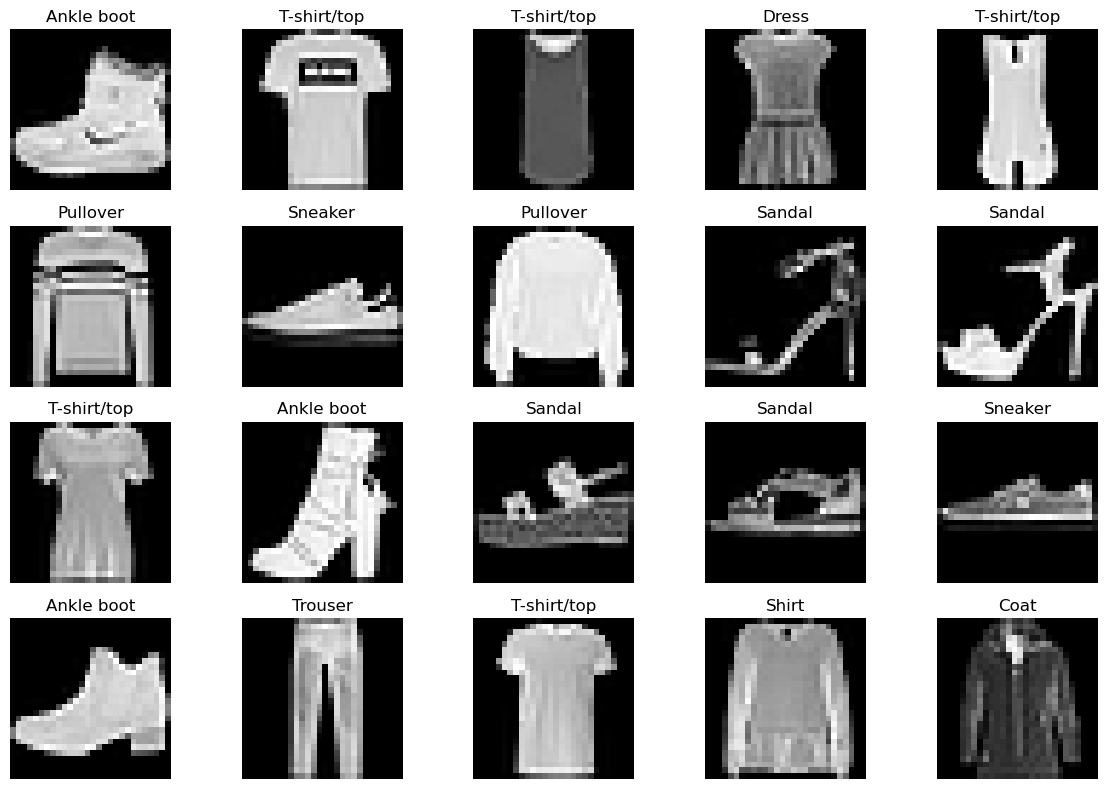

In [41]:
import matplotlib.pyplot as plt
# Verify the data looks as expected



fig, axes = plt.subplots(4, 5, figsize=(12, 8))  # bigger figure
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray', interpolation='nearest')  # better display
    ax.set_title(class_names[y_train[i]])  # show class name
    ax.axis('off')
plt.tight_layout()  # improve layout
plt.show()



Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**

The images look pixelated, but that’s expected because Fashion MNIST images are only 28×28 pixels, very low resolution. They will never look as sharp as normal photos. There are some duplicates in the dataset.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images into vectors of size 784
model.add(Dense(128, activation='relu'))  # Hidden layer with 128 neurons and ReLU activation
model.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons (one for each class) and softmax activation

# Compile the model using `model.compile()`
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with `model.fit()`
model.fit(X_train, y_train_cg, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test, y_test_cg)
print(f'Test accuracy: {accuracy}, Test Loss: {loss}')

c:\Users\alanm\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7830 - loss: 0.6286 - val_accuracy: 0.8575 - val_loss: 0.3949
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8600 - loss: 0.3895 - val_accuracy: 0.8722 - val_loss: 0.3585
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8781 - loss: 0.3395 - val_accuracy: 0.8700 - val_loss: 0.3538
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8845 - loss: 0.3171 - val_accuracy: 0.8772 - val_loss: 0.3448
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8926 - loss: 0.2941 - val_accuracy: 0.8802 - val_loss: 0.3338
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8970 - loss: 0.2823 - val_accuracy: 0.8807 - val_loss: 0.3237
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9009 - loss: 0.2698 - val_accuracy: 0.8810 - val_loss: 0.3233
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9045 - lo

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**

The baseline linear model achieved ~87.7% test accuracy. This is reasonable for a simple model, but it doesn’t capture spatial relationships in images. Its performance is limited by treating each pixel independently, so more complex patterns require a CNN for improvement.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [44]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train, y_train_cg, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test_cg)
print(f'CNN Test accuracy: {cnn_accuracy}, CNN Test Loss: {cnn_loss}')

c:\Users\alanm\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 73s 42ms/step - accuracy: 0.8240 - loss: 0.4986 - val_accuracy: 0.8855 - val_loss: 0.3168
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 67s 40ms/step - accuracy: 0.9086 - loss: 0.2505 - val_accuracy: 0.8902 - val_loss: 0.3043
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.9260 - loss: 0.1974 - val_accuracy: 0.9007 - val_loss: 0.2800
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - accuracy: 0.9451 - loss: 0.1513 - val_accuracy: 0.9012 - val_loss: 0.2788
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 68s 40ms/step - accuracy: 0.9595 - loss: 0.1120 - val_accuracy: 0.9062 - val_loss: 0.3009
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 68s 40ms/step - accuracy: 0.9704 - loss: 0.0836 - val_accuracy: 0.9063 - val_loss: 0.3263
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - accuracy: 0.9766 - loss: 0.0644 - val_accuracy: 0.9087 - val_loss: 0.3628
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 71s 42ms/step - accuracy: 0.9839 -

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**

The CNN model achieved about 90.5% test accuracy, outperforming the baseline (~87.7%). The improvement comes from the convolutional layers’ ability to capture spatial patterns and local features in images, which the linear model cannot do.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [45]:
# A. Test Hyperparameters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Ensure data is properly shaped
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train_ohe = to_categorical(y_train, 10)
y_test_ohe = to_categorical(y_test, 10)

# Define different filter values to test
filter_options = [16, 32, 64]
results = {}

for f in filter_options:
    print(f"\nTraining model with {f} filters...")
    
    model = Sequential([
        Conv2D(f, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train_cnn, y_train_ohe, epochs=5, batch_size=32, verbose=0)
    loss, acc = model.evaluate(X_test_cnn, y_test_ohe, verbose=0)
    
    results[f] = acc
    print(f"Test Accuracy with {f} filters: {acc:.4f}")

print("\nHyperparameter Experiment Results:")
for f, acc in results.items():
    print(f"{f} filters → Test Accuracy: {acc:.4f}")



Training model with 16 filters...
Test Accuracy with 16 filters: 0.9125

Training model with 32 filters...
Test Accuracy with 32 filters: 0.9074

Training model with 64 filters...
Test Accuracy with 64 filters: 0.9104

Hyperparameter Experiment Results:
16 filters → Test Accuracy: 0.9125
32 filters → Test Accuracy: 0.9074
64 filters → Test Accuracy: 0.9104


In [46]:
# B. Test presence or absence of regularization
from tensorflow.keras.layers import Dropout

results_reg = {}

for use_dropout in [False, True]:
    print(f"\nTraining model with Dropout = {use_dropout}")
    
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5) if use_dropout else Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train_cnn, y_train_ohe, epochs=5, batch_size=32, verbose=0)
    loss, acc = model.evaluate(X_test_cnn, y_test_ohe, verbose=0)
    
    results_reg["With Dropout" if use_dropout else "No Dropout"] = acc
    print(f"Test Accuracy ({'With' if use_dropout else 'No'} Dropout): {acc:.4f}")

print("\nRegularization Experiment Results:")
for setting, acc in results_reg.items():
    print(f"{setting} → Test Accuracy: {acc:.4f}")



Training model with Dropout = False
Test Accuracy (No Dropout): 0.9117

Training model with Dropout = True
Test Accuracy (With Dropout): 0.9047

Regularization Experiment Results:
No Dropout → Test Accuracy: 0.9117
With Dropout → Test Accuracy: 0.9047


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

Among the models tested, increasing the number of filters and applying dropout did not significantly improve performance. The model with 16 filters achieved the highest test accuracy (0.9125), suggesting that a smaller network generalized slightly better on this dataset. Adding dropout slightly reduced accuracy (from 0.9117 to 0.9047), likely because the model was already simple and not prone to overfitting. Overall, the best performance was achieved with 16 filters and no dropout, indicating that a smaller model without regularization was optimal for this task.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [47]:
# Final Model using best hyperparameters (16 filters, no dropout)
final_model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
final_model.fit(X_train_cnn, y_train_ohe, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test_ohe), verbose=1)

# Evaluate final model
loss, acc = final_model.evaluate(X_test_cnn, y_test_ohe, verbose=0)
print(f"\nFinal Model Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.8049 - loss: 0.5615 - val_accuracy: 0.8779 - val_loss: 0.3404
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8968 - loss: 0.2892 - val_accuracy: 0.8903 - val_loss: 0.3052
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9112 - loss: 0.2436 - val_accuracy: 0.9029 - val_loss: 0.2734
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.9249 - loss: 0.2048 - val_accuracy: 0.9079 - val_loss: 0.2604
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9332 - loss: 0.1804 - val_accuracy: 0.9020 - val_loss: 0.2813
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9404 - loss: 0.1588 - val_accuracy: 0.8986 - val_loss: 0.2991
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9477 - loss: 0.1414 - val_accuracy: 0.9161 - val_loss: 0.2560
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9523 -

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

The final model achieved a test accuracy of 91.46%, which is higher than both the baseline model (87.7%) and the initial CNN (90.5%). The improvement is mainly due to selecting the optimal number of filters (16), which reduced overfitting and improved generalization. Simpler architecture helped balance model complexity and performance.

If given more time, I would experiment with batch normalization, learning rate adjustments, or data augmentation to further enhance the model’s robustness and accuracy.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.